Librerias


In [195]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from sklearn.impute import SimpleImputer

Lectura de datos y formateo


In [196]:
FILENAME = 'data.csv'
dataset = pd.read_csv(FILENAME, index_col=0, dtype="Int64")
cols = dataset.columns
dataset.info()
dataset

<class 'pandas.core.frame.DataFrame'>
Index: 273 entries, 0 to 272
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Gender                   273 non-null    Int64
 1   Age                      273 non-null    Int64
 2   Schooling                272 non-null    Int64
 3   Breastfeeding            273 non-null    Int64
 4   Varicella                273 non-null    Int64
 5   Initial_Symptom          272 non-null    Int64
 6   Mono_or_Polysymptomatic  273 non-null    Int64
 7   Oligoclonal_Bands        273 non-null    Int64
 8   LLSSEP                   273 non-null    Int64
 9   ULSSEP                   273 non-null    Int64
 10  VEP                      273 non-null    Int64
 11  BAEP                     273 non-null    Int64
 12  Periventricular_MRI      273 non-null    Int64
 13  Cortical_MRI             273 non-null    Int64
 14  Infratentorial_MRI       273 non-null    Int64
 15  Spinal_Cord

,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
0,1,34,20,1,1,2,1,0,1,1,0,0,0,1,0,1,1,1,1
1,1,61,25,3,2,10,2,1,1,0,1,0,0,0,0,1,2,2,1
2,1,22,20,3,1,3,1,1,0,0,0,0,0,1,0,0,1,1,1
3,2,41,15,1,1,7,2,1,0,1,1,0,1,1,0,0,1,1,1
4,2,34,20,2,1,6,2,0,1,0,0,0,1,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,2,31,8,3,1,9,2,0,0,0,0,0,0,0,0,0,<NA>,<NA>,2
269,1,21,15,3,3,5,2,1,0,0,0,0,0,0,0,1,<NA>,<NA>,2
270,2,19,12,3,3,13,2,0,1,1,1,0,0,0,0,1,<NA>,<NA>,2
271,2,32,15,3,3,15,2,1,1,1,1,0,1,1,1,0,<NA>,<NA>,2


## Pre-procesamiento


-   Limpieza de datos


Imputación de datos faltantes para las variables Schooling y Initial_Symptoms


Schooling: Se imputa el dato faltante usando la mediana de la variable dado que es una variable numerica entera


In [197]:
cleaned_dataset = dataset.copy()
imputer = SimpleImputer(strategy='median')
cleaned_dataset['Schooling'] = imputer.fit_transform(
    cleaned_dataset[['Schooling']])
cleaned_dataset['Schooling'] = cleaned_dataset['Schooling'].astype('int64')
cleaned_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 273 entries, 0 to 272
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Gender                   273 non-null    Int64
 1   Age                      273 non-null    Int64
 2   Schooling                273 non-null    int64
 3   Breastfeeding            273 non-null    Int64
 4   Varicella                273 non-null    Int64
 5   Initial_Symptom          272 non-null    Int64
 6   Mono_or_Polysymptomatic  273 non-null    Int64
 7   Oligoclonal_Bands        273 non-null    Int64
 8   LLSSEP                   273 non-null    Int64
 9   ULSSEP                   273 non-null    Int64
 10  VEP                      273 non-null    Int64
 11  BAEP                     273 non-null    Int64
 12  Periventricular_MRI      273 non-null    Int64
 13  Cortical_MRI             273 non-null    Int64
 14  Infratentorial_MRI       273 non-null    Int64
 15  Spinal_Cord

Initial_Symptoms: Se imputa el dato faltante usando la moda de la variable dado que es una variable categorica


In [198]:
imputer = SimpleImputer(strategy='most_frequent')
cleaned_dataset['Initial_Symptom'] = imputer.fit_transform(
    cleaned_dataset[['Initial_Symptom']])
cleaned_dataset['Initial_Symptom'] = cleaned_dataset['Initial_Symptom'].astype(
    'int64')
cleaned_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 273 entries, 0 to 272
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Gender                   273 non-null    Int64
 1   Age                      273 non-null    Int64
 2   Schooling                273 non-null    int64
 3   Breastfeeding            273 non-null    Int64
 4   Varicella                273 non-null    Int64
 5   Initial_Symptom          273 non-null    int64
 6   Mono_or_Polysymptomatic  273 non-null    Int64
 7   Oligoclonal_Bands        273 non-null    Int64
 8   LLSSEP                   273 non-null    Int64
 9   ULSSEP                   273 non-null    Int64
 10  VEP                      273 non-null    Int64
 11  BAEP                     273 non-null    Int64
 12  Periventricular_MRI      273 non-null    Int64
 13  Cortical_MRI             273 non-null    Int64
 14  Infratentorial_MRI       273 non-null    Int64
 15  Spinal_Cord

Se selecciono la imputacion de datos, ya que permite mantener la integridad del conjunto de datos, evitando perder informacion valiosa contenida en las filas con datos faltantes. Ademas, en este caso es poco probable que la imputacion de datos introduzca un sesgo, ya que la cantidad de datos faltantes es baja en comparacion con el total de datos.


-   Eliminar columnas con muchos datos faltantes


Dada la ausencia total de los datos de las variables initial_edss y final_edss para el grupo 2 (no EMCD) y considerando que estas variables representan una escala de discapacidad aplicable a pacientes con esclerosis múltiple clínicamente definida (EMCD), parece estructuralmente coherente que estos datos estén faltantes para un grupo que no desarrolló la enfermedad. La eliminación de estas variables es justificada porque su inclusión con datos imputados artificialmente o su uso incompleto podría inducir un sesgo significativo en el análisis. Además, la imputación no sería apropiada dado que no hay base para estimar la discapacidad en pacientes que no han progresado a EMCD. Por lo tanto, para mantener la integridad y la precisión del análisis de clustering destinado a identificar patrones predictivos de progresión a EM desde SCA, es prudente excluir estas variables del análisis global y concentrarse en otras características clínicas y demográficas presentes en ambos grupos.


In [199]:
cleaned_dataset = cleaned_dataset.drop(
    ["Initial_EDSS", "Final_EDSS"], axis=1)
cleaned_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 273 entries, 0 to 272
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Gender                   273 non-null    Int64
 1   Age                      273 non-null    Int64
 2   Schooling                273 non-null    int64
 3   Breastfeeding            273 non-null    Int64
 4   Varicella                273 non-null    Int64
 5   Initial_Symptom          273 non-null    int64
 6   Mono_or_Polysymptomatic  273 non-null    Int64
 7   Oligoclonal_Bands        273 non-null    Int64
 8   LLSSEP                   273 non-null    Int64
 9   ULSSEP                   273 non-null    Int64
 10  VEP                      273 non-null    Int64
 11  BAEP                     273 non-null    Int64
 12  Periventricular_MRI      273 non-null    Int64
 13  Cortical_MRI             273 non-null    Int64
 14  Infratentorial_MRI       273 non-null    Int64
 15  Spinal_Cord

-   Normalizacion de los datos numericos


Se normalizan las variables numericas para que todas tengan la misma escala y no se vean afectadas por la magnitud de los valores al momento de realizar el clustering.


In [200]:
from sklearn.preprocessing import StandardScaler
normalized_dataset = cleaned_dataset.copy()
scaled_dataset = StandardScaler().fit_transform(
    normalized_dataset[['Age', 'Schooling']])
normalized_dataset[['Age', 'Schooling']] = scaled_dataset

### Clusterización de los datos


Se selecciona el algoritmo de KPrototypes, ya que es una extension del algoritmo KMeans que permite trabajar con datos mixtos (categoricos y numericos) y es adecuado para el tipo de datos que se tienen en el dataset.


Para escoger el numero de clusters se utiliza el metodo del codo y el metodo de la silueta.


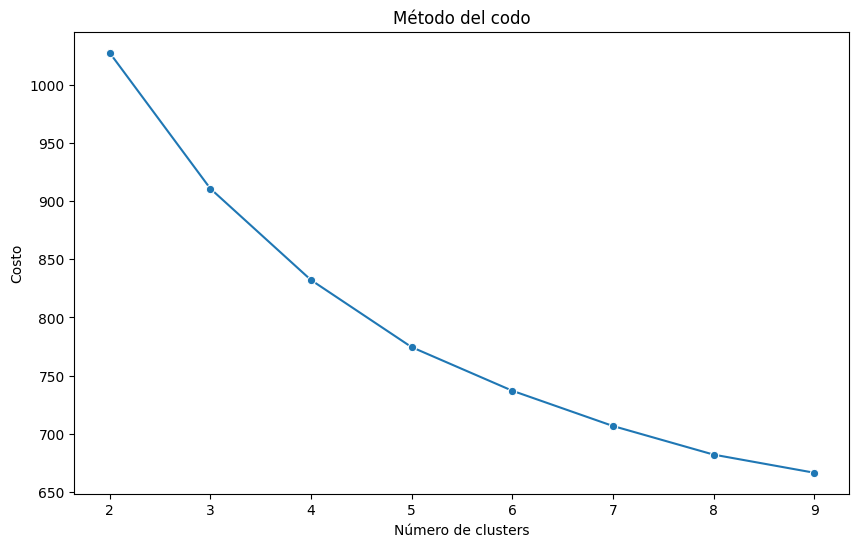

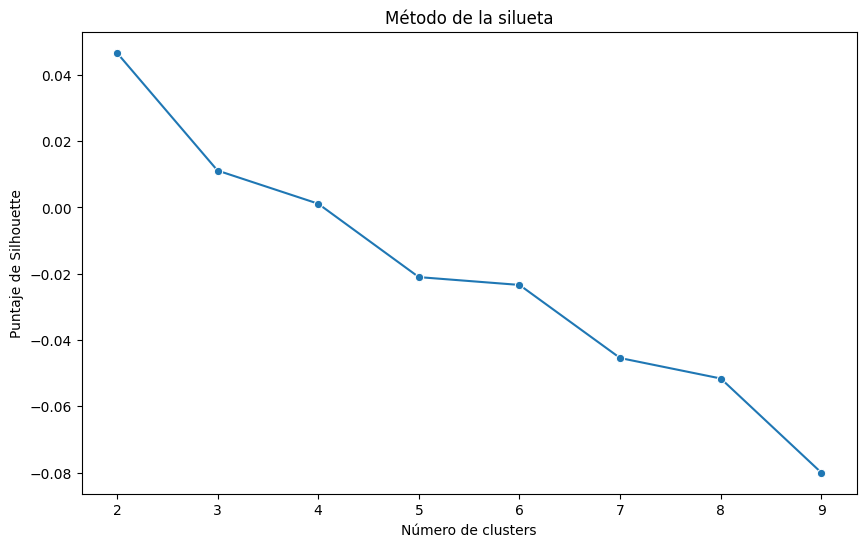

In [201]:
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score, davies_bouldin_score, homogeneity_score


RANDOM_STATE = 9



def elbow_method(dataset, start, end):
    range_num_clusters = list(range(start, end))

    categorical_index = list(range(3, 16))

    categorical_index.insert(0, 0)

    cost = []

    for n in range_num_clusters:

        kproto = KPrototypes(n_clusters=n,

                             init='Cao', verbose=0, n_jobs=-1, random_state=RANDOM_STATE)

        clusters = kproto.fit_predict(

            dataset, categorical=categorical_index)

        cost.append(kproto.cost_)


    plt.figure(figsize=(10, 6))

    ax = sns.lineplot(x=range_num_clusters, y=cost,

                      marker='o', dashes=False)

    ax.set(xlabel='Número de clusters', ylabel='Costo')

    ax.set_title('Método del codo')
    plt.plot()



def silhouette_method(dataset, start, end):
    range_num_clusters = list(range(start, end))

    categorical_index = list(range(3, 16))

    categorical_index.insert(0, 0)

    silhouette_avg_scores = []

    for n in range_num_clusters:

        kproto = KPrototypes(n_clusters=n,

                             init='Cao', verbose=0, n_jobs=-1, random_state=RANDOM_STATE)

        clusters = kproto.fit_predict(

            dataset, categorical=categorical_index)

        score = silhouette_score(dataset, clusters)

        silhouette_avg_scores.append(score)


    plt.figure(figsize=(10, 6))

    ax = sns.lineplot(x=range_num_clusters, y=silhouette_avg_scores,

                      marker='o', dashes=False)

    ax.set(xlabel='Número de clusters', ylabel='Puntaje de Silhouette')

    ax.set_title(f'Método de la silueta')
    plt.plot()



cluster_dataset = normalized_dataset.copy()

elbow_method(cluster_dataset.to_numpy(), 2, 10)

silhouette_method(cluster_dataset.to_numpy(), 2, 10)

Segun los dos metodos se tiene lo siguiente:

1. Método del Codo: En el grafico se puede observar una desaceleración del descenso en el costo alrededor de 4 clusters, sugiriendo que 4 podría ser un buen número de clusters.

2. Método de la Silueta: El gráfico muestra una disminución general en el puntaje después de 3 clusters, pero se observa un pequeño pico en 4 clusters antes de continuar descendiendo, lo cual podría indicar que 3 o 4 es un buen número de clusters.

Basado en lo anterior, la opcion más consistente y respaldada por ambos métodos es 4 clusters. Este número está respaldado por la presencia del "codo" en el gráfico del Método del Codo y un pico relativo en el puntaje de Silueta, lo cual sugiere que es un balance entre una buena partición de los datos y mantener el costo relativamente bajo.


Ahora se aplica el algoritmo de KPrototypes con 4 clusters y se obtiene la clusterizacion de los datos.


In [202]:
from kmodes.kprototypes import KPrototypes

X = cluster_dataset.to_numpy()
categorical_index = list(range(3, 16))
categorical_index.insert(0, 0)
kproto = KPrototypes(n_clusters=4, init='Cao', verbose=2,
                     n_jobs=-1, random_state=RANDOM_STATE)
clusters = kproto.fit_predict(
    X, categorical=categorical_index)

# print(kproto.cluster_centroids_)
# print(clusters)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 9


Evaluacion de los clusters


In [203]:
# Cálculo del Puntaje de Silueta
silhouette_avg = silhouette_score(X, clusters)
print(f"Puntaje de Silueta: {silhouette_avg}")

# Cálculo del Índice Davies-Bouldin
davies_bouldin_idx = davies_bouldin_score(X, clusters)
print(f"Índice Davies-Bouldin: {davies_bouldin_idx}")

Puntaje de Silueta: 0.001114201681195495
Índice Davies-Bouldin: 3.938712282767227


Realizado el clustering, se procede a analizar los resultados obtenidos.


se deja una funcion para pasar los datos categoricos a su valor escrito


In [204]:
def set_categorical_values(dataset):
    dataset = dataset.copy()
    gender = {1: "Masculino", 2: "Femenino"}
    breastfeeding = {1: "Si", 2: "No", 3: "Desconocido"}
    varicella = {1: "Positivo", 2: "Negativo", 3: "Desconocido"}
    initial_symptom = {1: "Visual", 2: "Sensorial", 3: "Motor", 4: "Otro",
                       5: "Visual y Sensorial", 6: "Visual y Motor", 7: "Visual y Otro",
                       8: "Sensorial y Motor", 9: "Sensorial y Otro", 10: "Motor y Otro",
                       11: "Visual, Sensorial y Motor", 12: "Visual, Sensorial y Otro",
                       13: "Visual, Motor y Otro", 14: "Sensorial, Motor y Otro",
                       15: "Visual, Sensorial, Motor y Otro"}
    mono_or_polysymptomatic = {1: "Monosintomático",
                               2: "Polisintomático", 3: "Desconocido"}
    oligoclonal_bands = {0: "Negativo", 1: "Positivo", 2: "Desconocido"}
    neg_pos = {0: "Negativo", 1: "Positivo"}
    group = {1: "EMCD", 2: "No EMCD"}
    neg_pos_vars = ["LLSSEP", "ULSSEP", "VEP", "BAEP", "Periventricular_MRI",
                    "Cortical_MRI", "Infratentorial_MRI", "Spinal_Cord_MRI"]

    dataset["Gender"] = dataset["Gender"].map(gender)
    dataset["Breastfeeding"] = dataset["Breastfeeding"].map(breastfeeding)
    dataset["Varicella"] = dataset["Varicella"].map(varicella)
    dataset["Initial_Symptom"] = dataset["Initial_Symptom"].map(
        initial_symptom)
    dataset["Mono_or_Polysymptomatic"] = dataset["Mono_or_Polysymptomatic"].map(
        mono_or_polysymptomatic)
    dataset["Oligoclonal_Bands"] = dataset["Oligoclonal_Bands"].map(
        oligoclonal_bands)
    for var in neg_pos_vars:
        dataset[var] = dataset[var].map(neg_pos)
    dataset["group"] = dataset["group"].map(group)
    return dataset

Se muestra la cantidad de datos en cada cluster divididos por el grupo al que pertenecen (EMCD [1] o no EMCD [2])


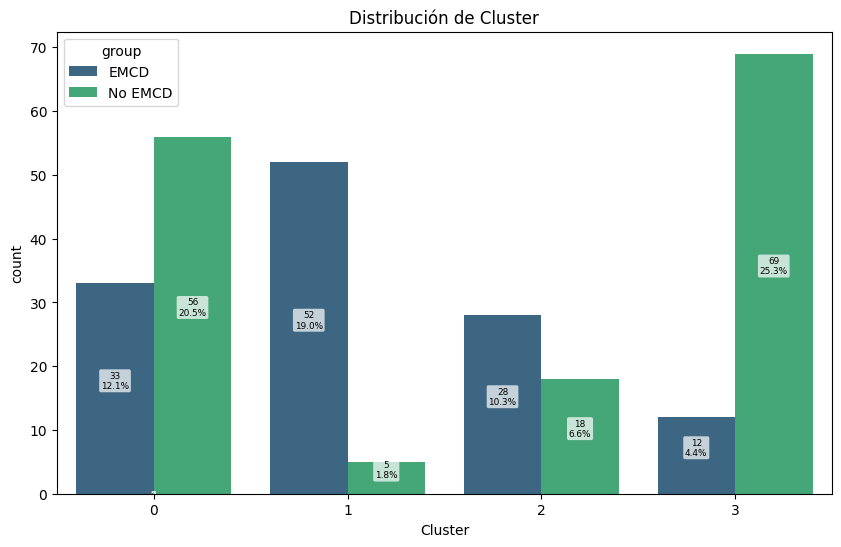

In [205]:
def plot_frecuency(dataset, var, hue="group", name=False):
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=var, data=dataset,
                       stat="count", palette="viridis", hue=hue)
    if(not name):
        name = var
    plt.title(f"Distribución de {name}")
    total = float(len(dataset))
    for p in ax.patches:
        height = p.get_height()
        ax.text(x=p.get_x()+(p.get_width()/2),
                y=height - height/2,
                s=f'{height:.0f}\n{height/total:.1%}',
                ha='center',
                fontdict={'size': p.get_width()*16},
                bbox=dict(facecolor='white', alpha=0.7, boxstyle="round,pad=0.2", edgecolor="none"))
    plt.show()

analisys_dataset = cleaned_dataset.copy()
analisys_dataset['Cluster'] = clusters
analisys_dataset_cat = set_categorical_values(analisys_dataset)
plot_frecuency(analisys_dataset_cat, 'Cluster')

Resumen para el analisis de las variables numericas para cada cluster asignado


In [206]:
numeric_summary = analisys_dataset.groupby('Cluster').agg(
    ['median', 'mean', 'std', 'min', 'max'])[['Age', 'Schooling']]
numeric_summary

Age                              Schooling                       \
        median       mean       std min max    median       mean       std   
Cluster                                                                      
0         28.0   28.41573  7.086814  16  46      20.0  19.022472  2.388312   
1         28.0  27.929825  6.627485  15  43      15.0  15.017544  2.715637   
2         50.0  51.913043  7.363049  41  77      15.0  14.739130  4.399165   
3         36.0  34.444444  7.607562  17  51      12.0  11.308642  2.639327   

                 
        min max  
Cluster          
0        15  25  
1         9  20  
2         6  25  
3         0  15

Resumen para el analisis de las variables categoricas para cada cluster asignado


In [207]:
variables_categoricas = dataset.columns[3:16]
variables_categoricas = variables_categoricas.insert(0, dataset.columns[0])
categoryc_summary = analisys_dataset_cat.groupby('Cluster').agg(
    [lambda x: pd.Series.mode(x).iat[0]])[variables_categoricas]
categoryc_summary

,Gender,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI
,<lambda>,<lambda>,<lambda>,<lambda>,<lambda>,<lambda>,<lambda>,<lambda>,<lambda>,<lambda>,<lambda>,<lambda>,<lambda>,<lambda>
Cluster,,,,,,,,,,,,,,
0,Femenino,Si,Positivo,Sensorial y Motor,Polisintomático,Negativo,Negativo,Negativo,Negativo,Negativo,Negativo,Negativo,Negativo,Negativo
1,Masculino,Si,Negativo,Motor,Polisintomático,Negativo,Positivo,Positivo,Positivo,Negativo,Positivo,Positivo,Positivo,Negativo
2,Femenino,Si,Negativo,Sensorial y Motor,Polisintomático,Negativo,Positivo,Positivo,Negativo,Negativo,Positivo,Positivo,Negativo,Positivo
3,Femenino,Desconocido,Negativo,Visual,Polisintomático,Negativo,Negativo,Negativo,Negativo,Negativo,Negativo,Negativo,Negativo,Negativo


Grafico de las variables categoricas para cada cluster asignado


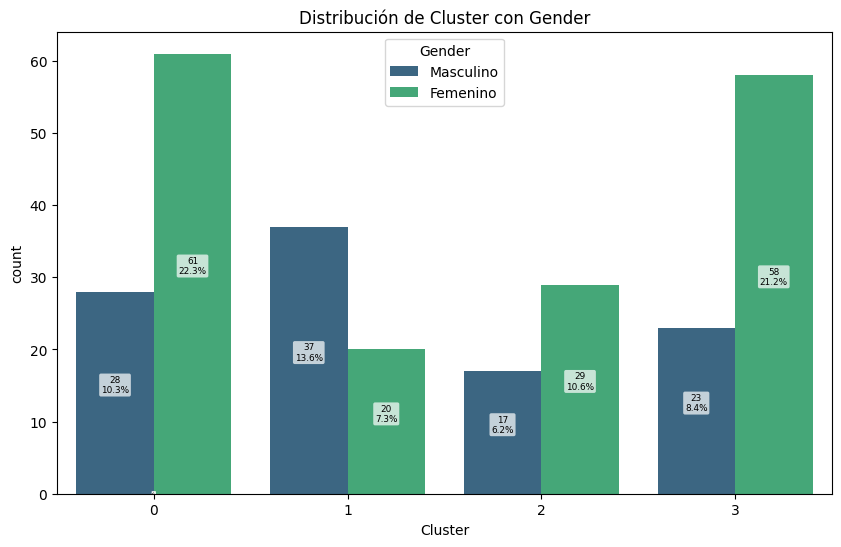

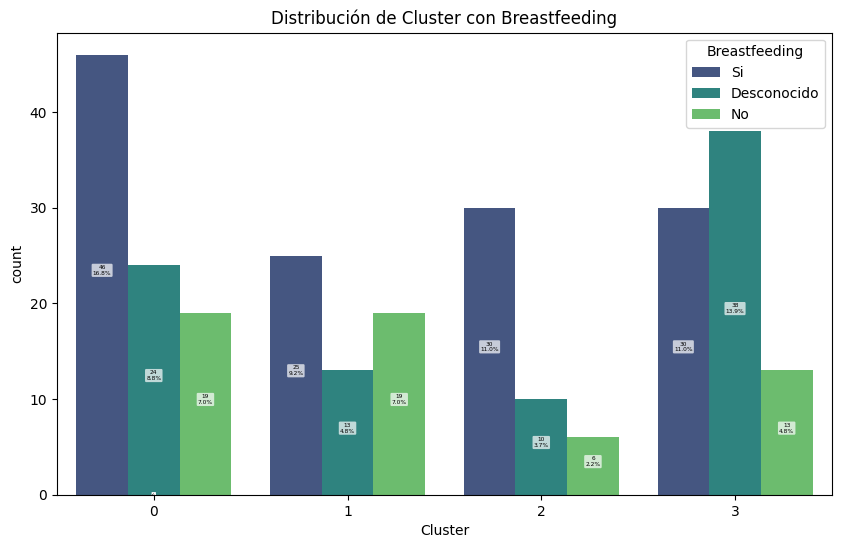

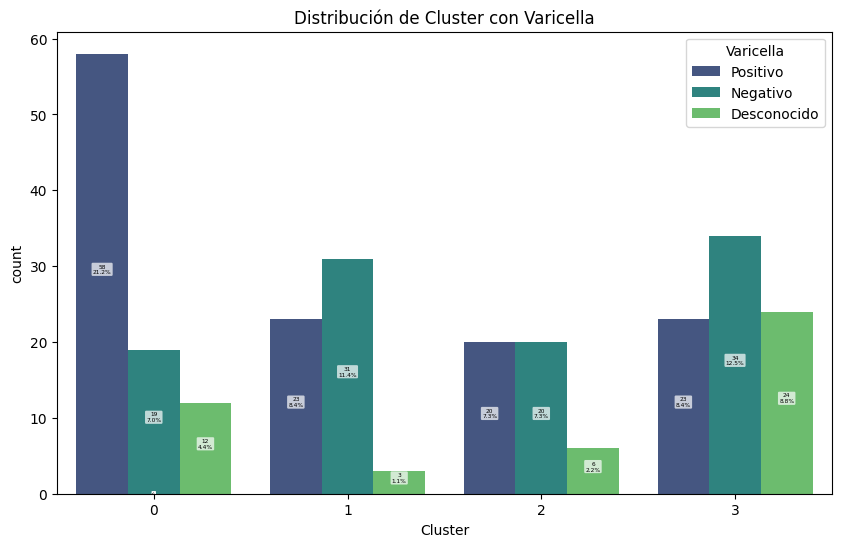

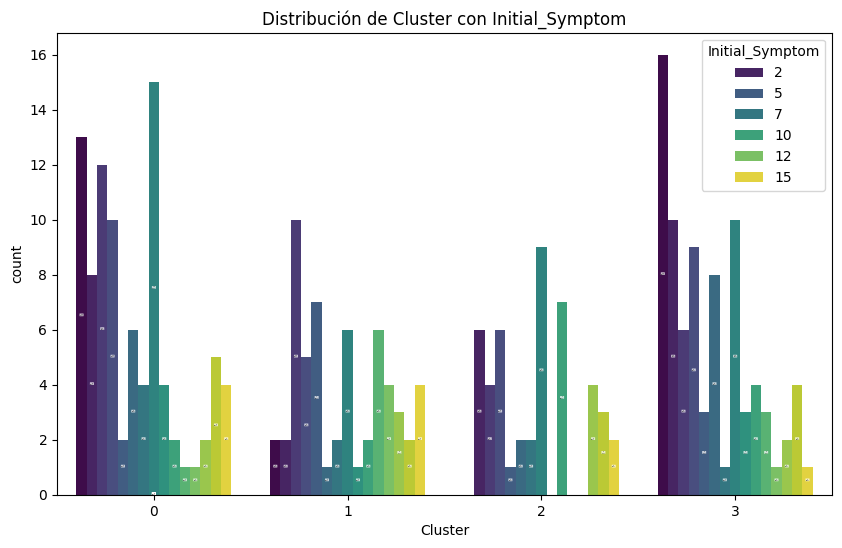

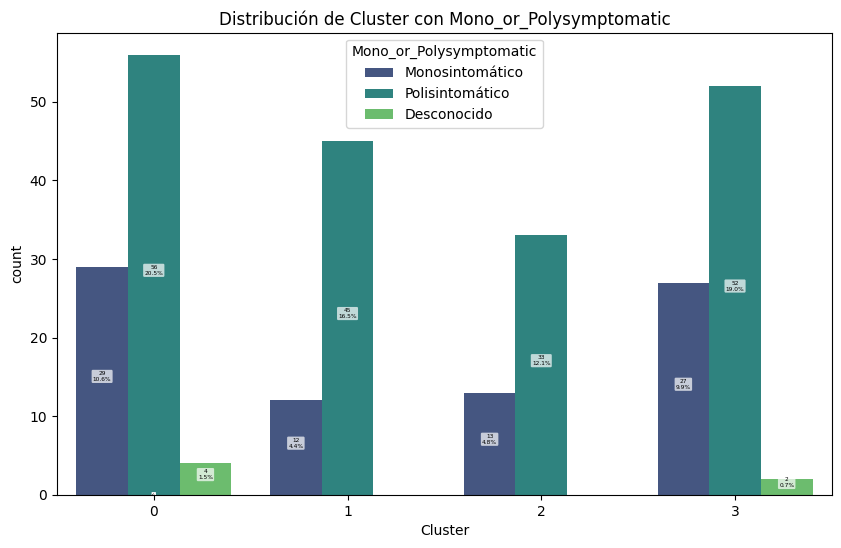

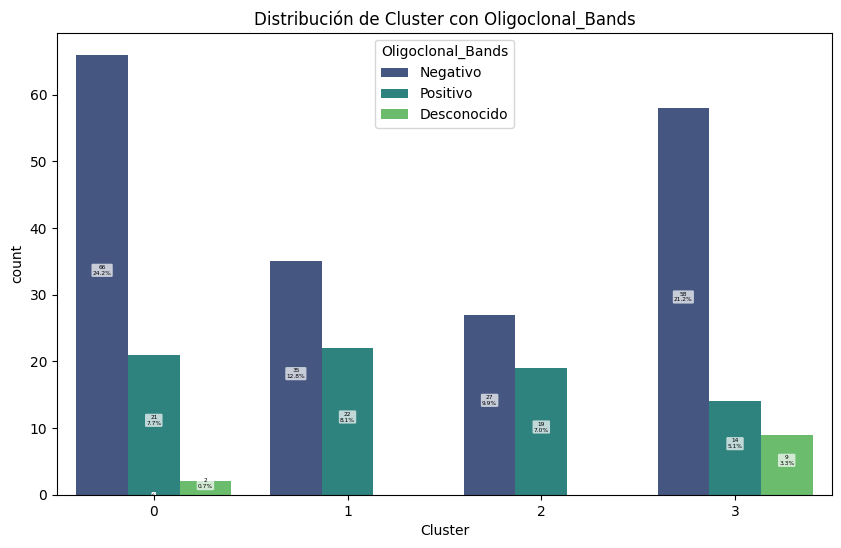

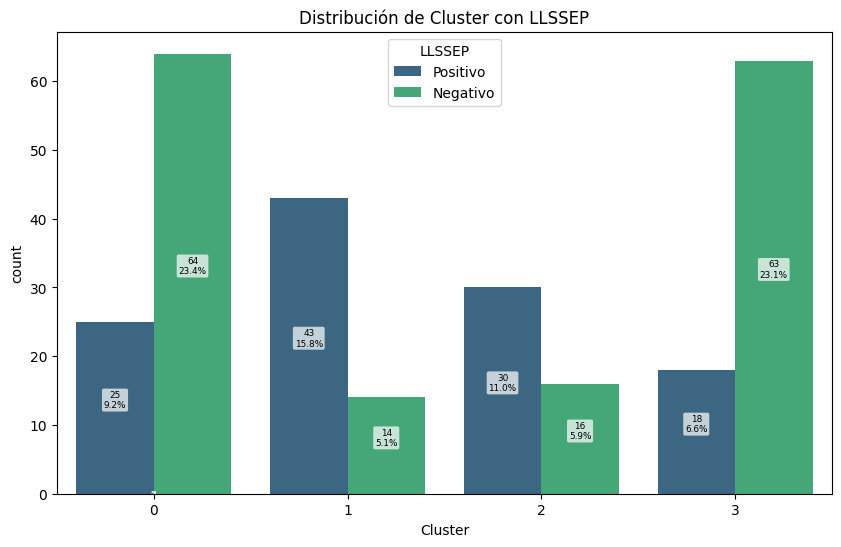

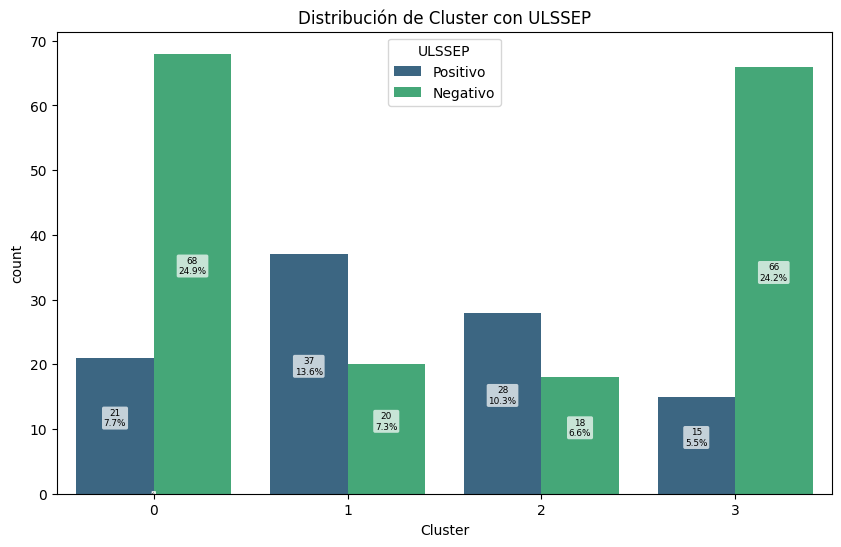

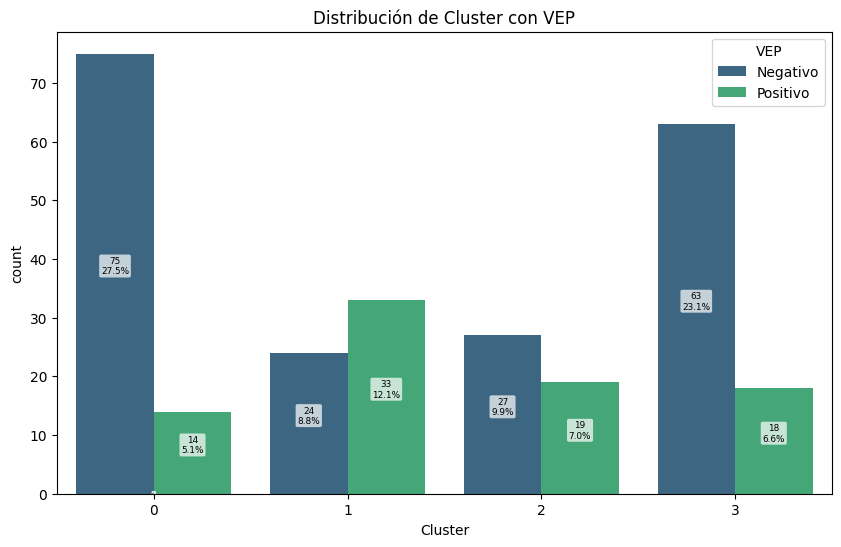

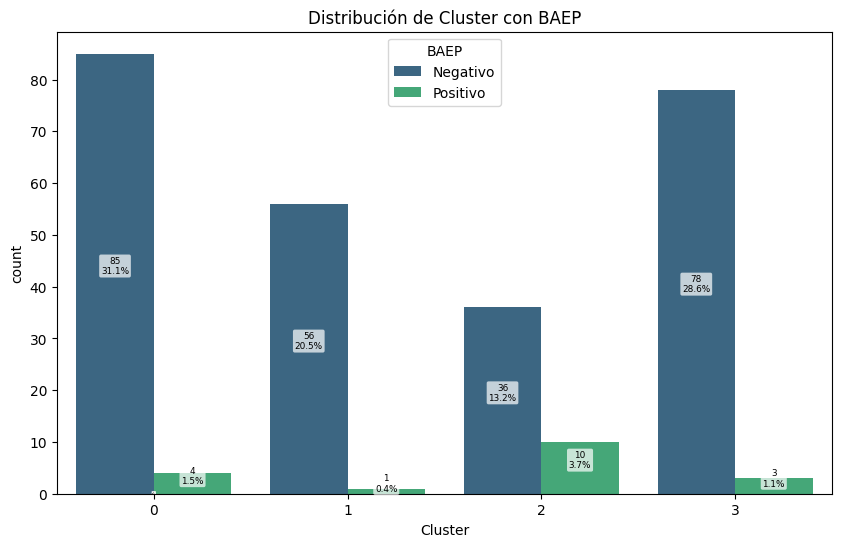

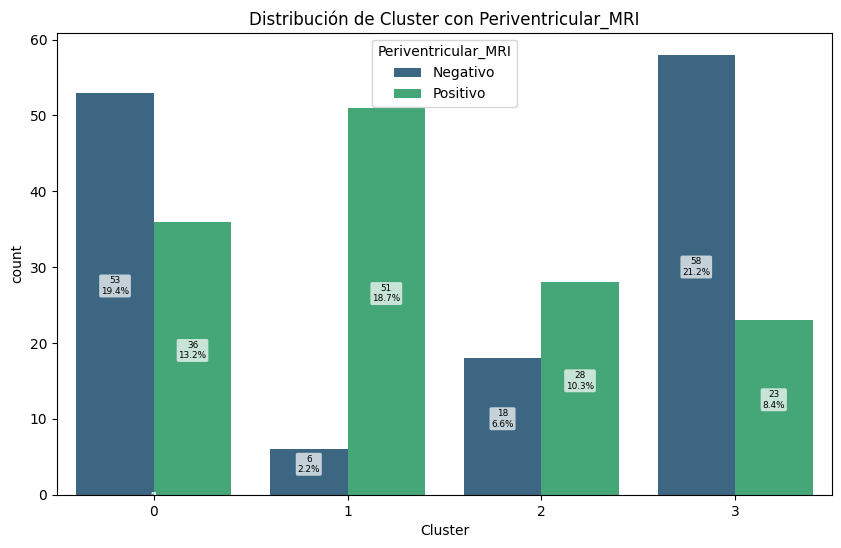

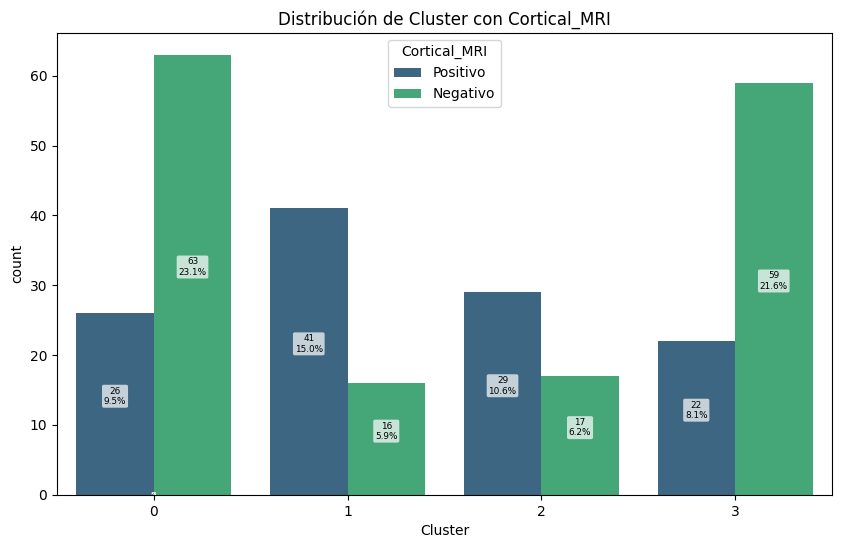

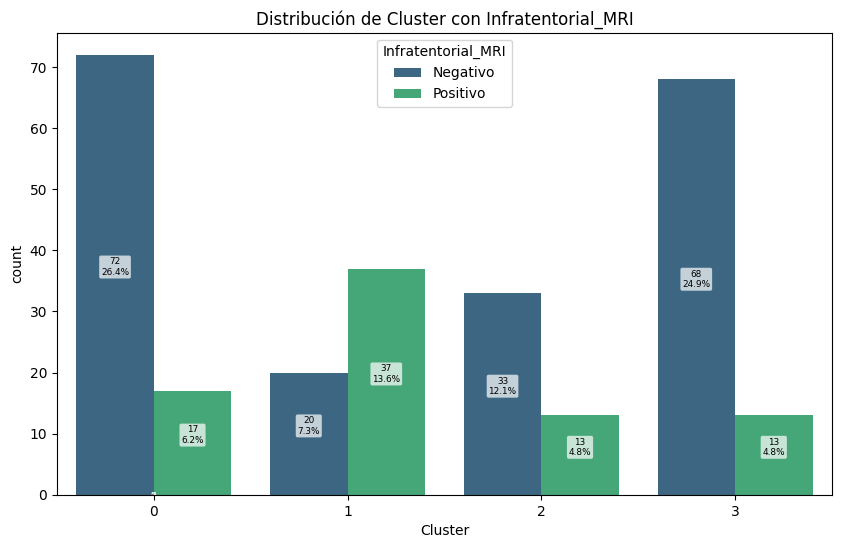

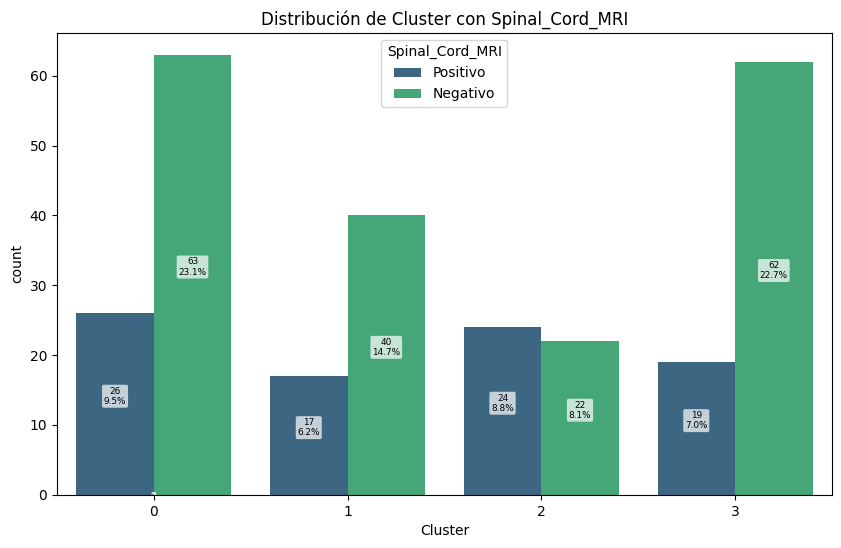

In [208]:
for var in variables_categoricas:
    plot_frecuency(
        analisys_dataset_cat if var != "Initial_Symptom" else analisys_dataset, "Cluster", hue=var, name=f"Cluster con {var}")

Grafico de las variables numericas para cada cluster asignado


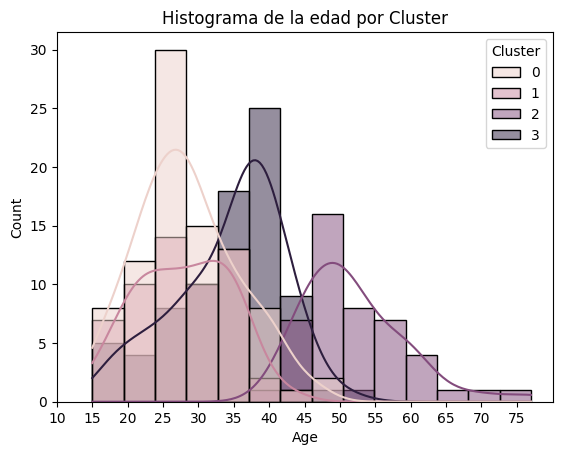

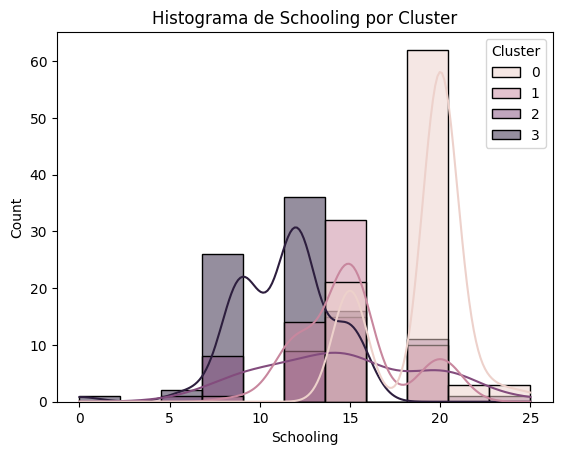

In [209]:
# Histograma de la edad por grupo
sns.histplot(analisys_dataset, x="Age", hue="Cluster", kde=True)
plt.xticks(np.arange(10, 80, 5))
plt.title("Histograma de la edad por Cluster")
plt.show()
# Histograma de tiempo en la escuela por grupo
sns.histplot(analisys_dataset, x="Schooling", hue="Cluster", kde=True)
plt.title("Histograma de Schooling por Cluster")
plt.show()

Analisis de Componentes Principales (PCA)


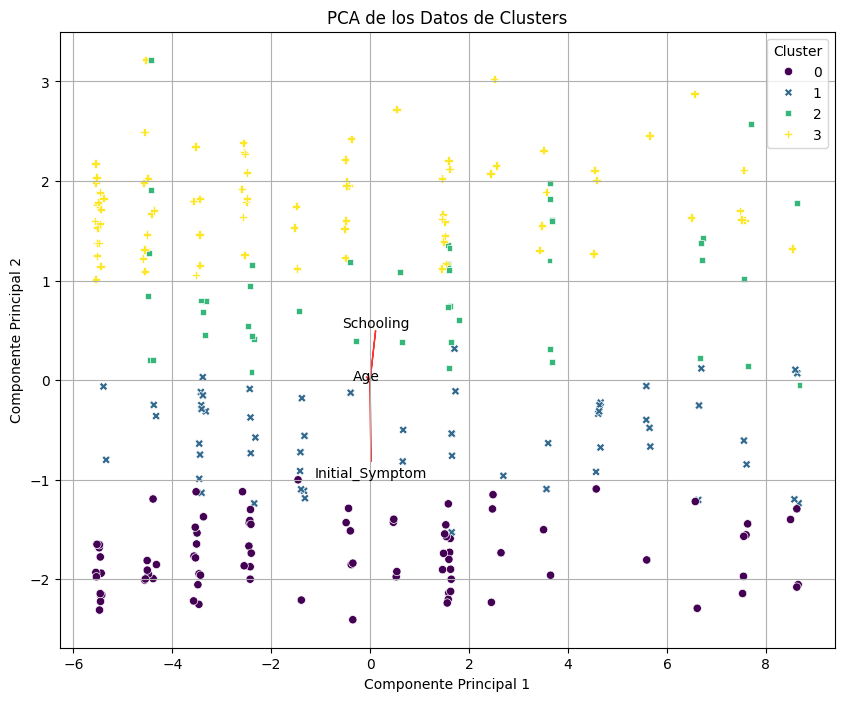

Varianza explicada por cada componente: [0.71114303 0.09481576 0.04129515 0.03395296 0.0214349  0.01517117
 0.01382293 0.0107059  0.00925338 0.00831604 0.00782945 0.00695057
 0.00615434 0.00544871 0.00478332 0.00383137 0.00312461 0.00196642]


In [210]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca_dataset = cluster_dataset.copy()
pca_dataset['Cluster'] = clusters
pca = PCA()
X_pca = pca.fit_transform(pca_dataset)

# Valores propios
eigenvalues = pca.explained_variance_

# Obtener los vectores de las variables
vectors = pca.components_.T * np.sqrt(pca.explained_variance_)
percent_eigenvalues = eigenvalues / sum(eigenvalues) * 100
pca_array = np.insert(vectors, 0, percent_eigenvalues, axis=0)
pca_array = np.insert(pca_array, 0, eigenvalues, axis=0)

dataset_columns = pca_dataset.columns
dataset_columns = dataset_columns.insert(0, 'Explicacion de Varianza (%)')
dataset_columns = dataset_columns.insert(0, 'Lambda')

# Crear un DataFrame con los vectores
pca_df = pd.DataFrame(pca_array, columns=[
                      f'PC{i+1}' for i in range(len(eigenvalues))], index=dataset_columns)

# print(pca_df)

# Añadir una fila con los valores propios
# pca_df.loc[0, 'Lambda'] = eigenvalues

pca_df

# Añadir las varianzas explicadas en porcentaje
# pca_df.loc['Explicacion de Varianza (%)'] = eigenvalues / \
#     sum(eigenvalues) * 100

# Mostrar la tabla
# print(pca_df)
dataset_columns = ['Age', 'Schooling', 'Initial_Symptom']

# Agregar los resultados al DataFrame para facilitar el plotting
pca_dataset['PCA1'] = X_pca[:, 0]
pca_dataset['PCA2'] = X_pca[:, 1]
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_dataset, x='PCA1', y='PCA2',
                hue='Cluster', palette='viridis', style='Cluster')
for i, varname in enumerate(dataset_columns):
    plt.arrow(0, 0, vectors[i, 0], vectors[i, 1], color='r', alpha=0.8)
    plt.text(vectors[i, 0] * 1.15, vectors[i, 1] * 1.15,
             varname, color='black', ha='center', va='center')

plt.title('PCA de los Datos de Clusters')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)

In [211]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
Lambda,17.988406,2.398370,1.044563,0.858842,0.542197,0.383756,0.349652,0.270806,0.234065,0.210355,0.198046,0.175815,0.155674,0.137825,0.120994,0.096915,0.079037,0.049741
Explicacion de Varianza (%),71.114303,9.481576,4.129515,3.395296,2.143490,1.517117,1.382293,1.070590,0.925338,0.831604,0.782945,0.695057,0.615434,0.544871,0.478332,0.383137,0.312461,0.196642
Gender,-0.071378,0.030047,-0.046932,0.017678,-0.210191,-0.131184,-0.027034,-0.021887,-0.086791,-0.146881,-0.340823,0.064881,-0.099236,0.077437,0.023174,0.012506,0.000795,0.020728
Age,0.109751,0.492780,-0.492626,0.690001,-0.002091,-0.042588,0.099922,0.115059,0.008189,-0.043220,0.035833,0.013325,0.030017,0.022779,0.000513,0.002334,-0.004490,-0.011590
Schooling,0.014926,-0.815824,-0.012925,0.421175,-0.141084,0.181493,-0.232506,-0.156647,-0.115306,0.106120,0.001301,0.018659,-0.010396,-0.010219,0.056633,-0.015135,-0.013244,-0.012496
Breastfeeding,0.013705,0.190837,0.746877,0.282606,0.101751,0.014022,0.014213,0.192243,-0.191924,-0.032473,0.026705,-0.034208,-0.035222,0.046875,0.010941,-0.001721,0.016758,0.000453
Varicella,0.005988,0.286940,0.448273,0.310174,0.045055,-0.062693,0.046001,-0.231155,0.277830,0.042297,-0.091028,0.049846,0.030419,-0.069829,0.002159,0.021608,-0.010943,0.009916
Initial_Symptom,4.214730,0.013458,0.020002,-0.021019,-0.053430,-0.008796,0.007104,-0.008629,0.004060,0.010013,0.005996,-0.009731,-0.017006,0.014145,-0.005622,-0.002608,-0.007011,-0.002109
Mono_or_Polysymptomatic,0.261375,-0.014067,0.039912,-0.027974,-0.040957,-0.015927,-0.130553,-0.002423,-0.041822,-0.261994,0.053552,0.102425,0.184849,-0.140066,0.088621,0.047979,0.080852,0.001047
Oligoclonal_Bands,0.065465,0.025611,0.010662,-0.032952,0.037852,0.421654,-0.117005,0.207040,0.222413,-0.087704,-0.070020,0.033923,-0.044120,0.041469,0.044174,0.001232,-0.031591,-0.009396
